<a href="https://colab.research.google.com/github/Harshit1123/LGMVIP-DataScience/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df = df.sort_values(by='Date', ascending=True)

df.tail()

In [ ]:
df.shape

(2035, 8)

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df1 = df.reset_index()['Close']
df1.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

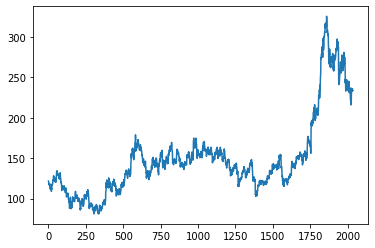

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [ ]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
def create_dataset(dataset, time_step=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step -1):
        
        a = dataset[i:(i + time_step), 0] # i = 0, 1, 2, 3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


In [ ]:
print(X_train.shape) 
print(y_train.shape)


(1221, 100)
(1221,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(test_data)

713

In [ ]:
x_input = test_data[613:].reshape(1, -1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input


[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i<30):

  if (len(temp_input)>100):

    # print(tem_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    # print(x_input)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    # print(temp_input)

    lst_output.extend(yhat.tolist())
    i = i + 1

  else:

    x_input = x_input.reshape((1, n_steps, 1))
    
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))

    lst_output.extend(yhat.tolist())
    i = i+1

[-0.0620781]
101
1 day input [ 0.86213235  0.83455882  0.84375     0.71466503  0.66053922  0.65420752
  0.68035131  0.6689134   0.66421569  0.67892157  0.69138072  0.70894608
  0.72263072  0.73406863  0.72120098  0.74979575  0.7689951   0.74468954
  0.7120098   0.74673203  0.75490196  0.76041667  0.75980392  0.74652778
  0.76245915  0.77062908  0.80412582  0.78104575  0.79411765  0.76021242
  0.73488562  0.72406046  0.73999183  0.74979575  0.76143791  0.75428922
  0.74754902  0.76960784  0.7495915   0.81719771  0.80208333  0.77736928
  0.75714869  0.79370915  0.79166667  0.77144608  0.75265523  0.72691993
  0.6629902   0.68198529  0.64419935  0.62152778  0.6439951   0.66319444
  0.67544935  0.63705065  0.64603758  0.65890523  0.65870098  0.67790033
  0.63194444  0.63112745  0.62785948  0.64767157  0.63991013  0.63480392
  0.63868464  0.62336601  0.62745098  0.63970588  0.64705882  0.66196895
  0.67075163  0.65196078  0.63112745  0.61294935  0.6376634   0.62254902
  0.62745098  0.633374

In [ ]:
print(lst_output)

[[-0.06207809969782829], [-0.061491627246141434], [-0.05994388461112976], [-0.05742507055401802], [-0.05406941473484039], [-0.05008399859070778], [-0.045695509761571884], [-0.041116099804639816], [-0.036525655537843704], [-0.0320652537047863], [-0.027837736532092094], [-0.023911939933896065], [-0.020328456535935402], [-0.017105570062994957], [-0.0142447454854846], [-0.011735274456441402], [-0.009558139368891716], [-0.007689031306654215], [-0.006100694183260202], [-0.0047646574676036835], [-0.0036525102332234383], [-0.0027367821894586086], [-0.0019915513694286346], [-0.0013927973341196775], [-0.0009186171810142696], [-0.0005493053467944264], [-0.00026734068524092436], [-5.731539204134606e-05], [9.417396358912811e-05], [0.00019866817456204444]]


In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
import matplotlib.pyplot as plt
len(df1)

2035

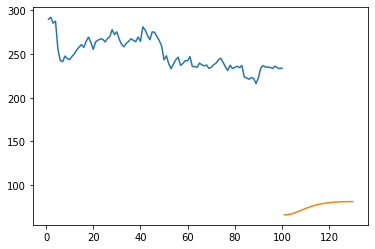

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

plt.plot(day_new, scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.show()

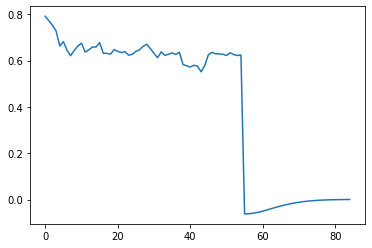

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1980:])

In [ ]:
df3 = scaler.inverse_transform(df3).tolist()

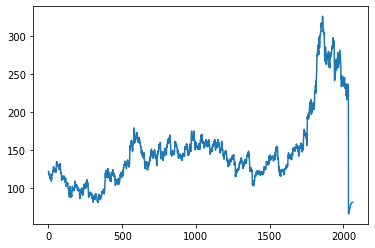

In [ ]:
plt.plot(df3)
